In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel(r'../Cascade_Seismic_Stations.xlsx', sheet_name='Sisters')
df_s=df.iloc[0:210]
df_s=df_s.sort_values('Start Yr', ascending=True)
df_t=df_s.loc[df_s['Latitude']>0].reset_index(drop=True)

In [4]:
df_t

,Network,Name,Latitude,Longitude,Start Date,End Date,Start Yr,End Yr,"Classification: 1sp, 3sp, 3bb",Unnamed: 9,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,UW,TCO,44.107498,-121.601730,1987-08-29,2002-08-15 00:00:00,1987.0,2002.0,1sp,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Long history, but basicaly EHZ all the time, b..."
1,UW,MOON,44.051552,-121.669479,2002-07-25,2599-12-31 00:00:00,2002.0,2599.0,1sp,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CC,WIFE,44.059660,-121.817460,2004-07-28,2599-12-31 00:00:00,2004.0,2599.0,3bb,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UW,BKC,44.299259,-121.697159,2004-04-06,2014-05-29 00:00:00,2004.0,2014.0,1sp,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CC,PRLK,44.209750,-121.962640,2006-09-15,2599-12-31 00:00:00,2006.0,2599.0,3bb,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CC,TCBU,44.240830,-121.664380,2008-04-22,2599-12-31 00:00:00,2008.0,2599.0,3bb,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,CC,HUSB,44.119455,-121.849361,2013-08-14,2018-08-16 00:00:00,2013.0,2018.0,3sp,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CC,HUSB,44.119455,-121.849361,2018-08-16,2599-12-31 00:00:00,2018.0,2599.0,3bb,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
sp1_p=(df_t['Classification: 1sp, 3sp, 3bb ']=="1sp") & (df_t['End Yr']>=2022)
bb3_p=(df_t['Classification: 1sp, 3sp, 3bb ']=="3bb")  & (df_t['End Yr']>=2022)
sp3_p=(df_t['Classification: 1sp, 3sp, 3bb ']=="3sp")& (df_t['End Yr']>=2022)

sp1_r=(df_t['Classification: 1sp, 3sp, 3bb ']=="1sp") & (df_t['End Yr']<2022)
bb3_r=(df_t['Classification: 1sp, 3sp, 3bb ']=="3bb")  & (df_t['End Yr']<2022)
sp3_r=(df_t['Classification: 1sp, 3sp, 3bb ']=="3sp")& (df_t['End Yr']<2022)

In [5]:
df_t.loc[sp3_p]
df_t['Name_No_Temp']=df_t['Name']

## Loop for unique /name

C:\Users\penny\AppData\Local\Temp\ipykernel_5776\2428444730.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(name.tolist())#, rotation=90)


['TCO' 'MOON' 'WIFE' 'BKC' 'PRLK' 'TCBU' 'HUSB']


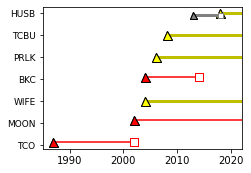

In [6]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10*(139.5/254)*0.65,4*(78.1/101.6)*0.85), sharey=True)

Unique_station=df_t['Name_No_Temp'].unique()
i=0
name=np.empty((len(Unique_station)),  np.dtype('U100'))
for station in Unique_station:
    #print(station)
    name[i]=str(df_t['Name_No_Temp'].loc[df_t['Name_No_Temp']==station].iloc[0])
    if any(df_t['Classification: 1sp, 3sp, 3bb '].loc[df_t['Name_No_Temp']==station]=="1sp"):
        Stat_type_1sp=((df_t['Name_No_Temp']==station)&(df_t['Classification: 1sp, 3sp, 3bb ']=="1sp"))
        ax1.plot([df_t['Start Yr'].loc[Stat_type_1sp],
                  df_t['End Yr'].loc[Stat_type_1sp]], [i+0.1, i+0.1], '-r')
        ax1.plot([df_t['End Yr'].loc[Stat_type_1sp],
                  df_t['End Yr'].loc[Stat_type_1sp]], [i+0.1, i+0.1], 'sk', mec='red',mfc='white', ms=8)
        ax1.plot([df_t['Start Yr'].loc[Stat_type_1sp],
                  df_t['Start Yr'].loc[Stat_type_1sp]], [i+0.1, i+0.1], '^k', mfc='red', ms=9)

    if any(df_t['Classification: 1sp, 3sp, 3bb '].loc[df_t['Name_No_Temp']==station]=="3bb"):
        Stat_type_3bb=((df_t['Name_No_Temp']==station)
                       &(df_t['Classification: 1sp, 3sp, 3bb ']=="3bb"))
        ax1.plot([df_t['Start Yr'].loc[Stat_type_3bb],
                  df_t['End Yr'].loc[Stat_type_3bb]], [i, i], '-y', linewidth=3)
        ax1.plot([df_t['End Yr'].loc[Stat_type_3bb],
                  df_t['End Yr'].loc[Stat_type_3bb]], [i, i], 'sk', mec='k', mfc='white', ms=4, zorder=1000)
        ax1.plot([df_t['Start Yr'].loc[Stat_type_3bb],
                  df_t['Start Yr'].loc[Stat_type_3bb]], [i, i],  '^k', mfc='yellow', ms=9)

    if any(df_t['Classification: 1sp, 3sp, 3bb '].loc[df_t['Name_No_Temp']==station]=="3sp"):
        Stat_type_3sp=((df_t['Name_No_Temp']==station)
                       &(df_t['Classification: 1sp, 3sp, 3bb ']=="3sp"))
        ax1.plot([df_t['Start Yr'].loc[Stat_type_3sp],
                  df_t['End Yr'].loc[Stat_type_3sp]], [i-0.1, i-0.1], '-', color='grey', linewidth=3, zorder=100)
        ax1.plot([df_t['End Yr'].loc[Stat_type_3sp],
                  df_t['End Yr'].loc[Stat_type_3sp]], [i-0.1, i-0.1], 'sk', mec='grey', mfc='white', ms=5, zorder=100)
        ax1.plot([df_t['Start Yr'].loc[Stat_type_3sp],
                  df_t['Start Yr'].loc[Stat_type_3sp]], [i-0.1, i-0.1], '^k', mfc='grey', ms=7, zorder=100)
        
        # Now print the lines
        
    i=i+1

#     if df_t['Classification: 1sp, 3sp, 3bb '].iloc[i]=="3bb":
#         ax1.plot([df_t['Start Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '-',
#                  color='y', lw=3)
#         ax1.plot([df_t['End Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '*k', mfc='yellow', ms=12)
        
#     if df_t['Classification: 1sp, 3sp, 3bb '].iloc[i]=="3sp":
#         ax1.plot([df_t['Start Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '-',
#                  color='grey', lw=3)
#         ax1.plot([df_t['End Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '*k', mfc='grey', ms=12)
        
        
#     #ax1.plot([df_t['Start Yr'].iloc[i],df_t['Start Yr'].iloc[i]], [i, i], '^k', mfc='white')
#     #ax1.plot([df_t['End Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '*k', mfc='white', ms=8)
ax1.set_xlim([1985, 2022])
#     name[i]=str(df_t['Name'].iloc[i])
#     #print(df_t['Name'].iloc[i])
ax1.set_yticklabels(name.tolist())#, rotation=90)
ticks_loc = ax1.get_yticks().tolist()
ax1.set_yticks([0, 1, 2, 3, 4, 5, 6])
print(name)
ax1.set_yticklabels(name.tolist(), fontsize=9)

# #df_t['Classification: 1sp, 3sp, 3bb ']
fig.savefig('Sisters_Seismic_Stations.png', dpi=300, bbox_inches='tight')

In [23]:
name_plot=np.empty((len(df_t)),  np.dtype('U100'))
for i in range(0, len(df_t)):
    name_plot[i]=str(df_t['Name_No_Temp'].iloc[i])

In [24]:
df['Longitude'].unique()

array([-121.849361, -121.96264 , -121.66438 , -121.81746 , -121.697159,
       -121.669479, -121.60173 ])

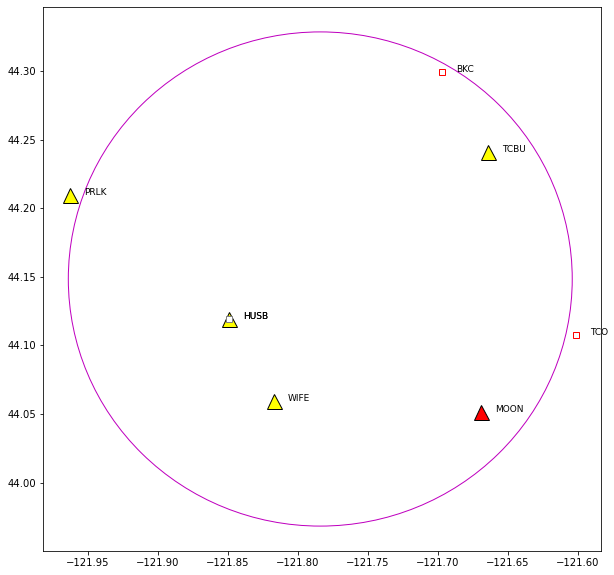

In [25]:
fig, (ax1) = plt.subplots(1, figsize=(10,10), sharey=True)

import matplotlib.patches as patches
rect = patches.Circle((-121.7841203,44.1483796),0.18,linewidth=1,edgecolor='m',facecolor='none', label='test')

# Add the patch to the Axes
ax1.add_patch(rect)

ax1.plot(df_t['Longitude'].loc[sp1_p],
              df_t['Latitude'].loc[sp1_p],
         '^k', mfc='red', ms=15)
ax1.plot(df_t['Longitude'].loc[bb3_p],
              df_t['Latitude'].loc[bb3_p],
         '^k', mfc='yellow', ms=15)
ax1.plot(df_t['Longitude'].loc[sp3_p],
              df_t['Latitude'].loc[sp3_p],
         '^k', mfc='grey', ms=15)


ax1.plot(df_t['Longitude'].loc[sp1_r],
              df_t['Latitude'].loc[sp1_r],
         'sr',  mfc='w')
ax1.plot(df_t['Longitude'].loc[bb3_r],
              df_t['Latitude'].loc[bb3_r],
         'sy',  mfc='w')
ax1.plot(df_t['Longitude'].loc[sp3_r],
              df_t['Latitude'].loc[sp3_r],
         's', mec='grey', mfc='w')
for i in range(0, len(df_t)):
    ax1.annotate(name_plot[i],
                 xy=(df_t['Longitude'].iloc[i]+0.01,
              df_t['Latitude'].iloc[i]),
                 xycoords="data", fontsize=9)

In [24]:
str(df_t['Name'].values)

"['LBA' 'LCF' 'LDH' 'LEL' 'LEL (temp)' 'LME' 'LMZ' 'LRD'\n 'LRD (temp. upgrade)' 'LRR' 'LRR (upgrade)' 'LSI' 'LSL']"

## Different plots showing age progresion

In [7]:
a=['Exp Pet', 'Exp Pet', 'MT', 'Seismics']
type(a)

list

In [8]:
name=np.empty(len(df_t), np.dtype('U100'))
df_t['Name'].iloc[1]
name[1]=str(df_t['Name'].iloc[1])

In [9]:
name

array(['', 'LCF', '', '', '', '', '', '', '', '', '', '', ''],
      dtype='<U100')

['LBA' 'LCF' 'LDH' 'LEL' 'LEL (temp)' 'LME' 'LMZ' 'LRD'
 'LRD (temp. upgrade)' 'LRR' 'LRR (upgrade)' 'LSI' 'LSL']


[Text(0, 0, 'LBA'),
 Text(0, 1, 'LCF'),
 Text(0, 2, 'LDH'),
 Text(0, 3, 'LEL'),
 Text(0, 4, 'LEL (temp)'),
 Text(0, 5, 'LME'),
 Text(0, 6, 'LMZ'),
 Text(0, 7, 'LRD'),
 Text(0, 8, 'LRD (temp. upgrade)'),
 Text(0, 9, 'LRR'),
 Text(0, 10, 'LRR (upgrade)'),
 Text(0, 11, 'LSI'),
 Text(0, 12, 'LSL')]

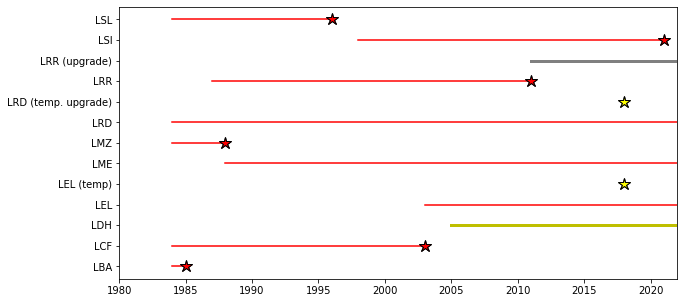

In [94]:
len(name)

13

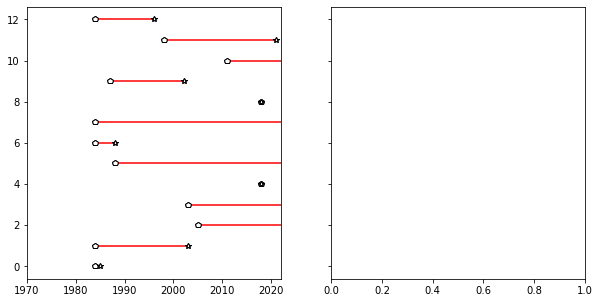

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
for i in range(0, len(df_t)):
    if 
    ax1.plot([df_t['Start Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '-r')
    ax1.plot([df_t['Start Yr'].iloc[i],df_t['Start Yr'].iloc[i]], [i, i], '^k', mfc='white')
    ax1.plot([df_t['End Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '*k', mfc='white')
    ax1.set_xlim([1970, 2022])
#df_t['Classification: 1sp, 3sp, 3bb ']

# 0  Bar for each different seimometer

## 1. CDF function